In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

In [9]:
train=pd.read_csv('../nlp-getting-started/train.csv')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [10]:
def includes_website(text):
    website = int('http' in text)
    return website

In [11]:
def hashtags(text):
    hashtags=[]
    for word in text.split():
        if '#' in word:
            if word.count('#') == 1:
                hashtags.append(word[word.find('#')+1:])
            else:
                for subword in word[word.find('#'):].split('#')[1:]:
                    hashtags.append(subword)
    return hashtags
hashtags('this #is #test#of the#function')

['is', 'test', 'of', 'function']

In [12]:
def mentions(text):
    mentions=[]
    for word in text.split():
        if '@' in word:
            if word.count('@') == 1:
                mentions.append(word[word.find('@')+1:])
            else:
                for subword in word[word.find('@'):].split('@')[1:]:
                    mentions.append(subword)
    return mentions
mentions('What if @we mention@many@people')

['we', 'many', 'people']

In [13]:
def remove_extras(text):
    out_text=[]
    for word in text.split():
        if '#' in word:
            out_text.append(word[0:word.find('#')])
        elif '@' in word:
            out_text.append(word[0:word.find('@')])
        elif 'http' in word:
            out_text.append(word[0:word.find('http')])
        else:
            out_text.append(word)
    return ' '.join(out_text).replace('  ',' ')
remove_extras('This is#a @test ofhttp://removing extras')


'This is of extras'

In [14]:
def alphanumeric(text):
    output = re.sub(r'[A-Za-z0-9 ]+','',text)
    return output.replace('  ',' ')

In [18]:
stopwords = []
for word in nltk.corpus.stopwords.words('english'):
    stopwords.append(alphanumeric(word))
stopwords = set(stopwords)
def remove_stopwords(text):
    out = []
    for word in text.split():
        if word.lower() in stopwords:
            pass
        else:
            out.append(word.lower())
    return ' '.join(out)

In [19]:
def preprocess(data):
    data['includes_website'] = data.text.apply(lambda x: includes_website(x))
    data['hashtags'] = data.text.apply(lambda x: hashtags(x))
    data['num_hashtags'] = data.hashtags.apply(lambda  x: len(x))
    data['mentions'] = data.text.apply(lambda x: mentions(x))
    data['num_mentions'] = data.mentions.apply(lambda x:len(x))
    data['tweet_length'] = data.text.apply(lambda x: len(x))
    data['clean_text'] = data.text.apply(lambda x: remove_stopwords(alphanumeric(remove_extras(x))))
    return data

In [20]:
train=preprocess(train)
train

,id,keyword,location,text,target,includes_website,hashtags,num_hashtags,mentions,num_mentions,tweet_length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,[earthquake],1,[],0,69,
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,[],0,[],0,38,.
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,[],0,[],0,133,''.
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0,[wildfires],1,[],0,65,","
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,"[Alaska, wildfires]",2,[],0,88,
...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,1,[],0,[],0,83,
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,[],0,"[aria_ahrary, TheTawniest]",2,125,..
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,1,[],0,[],0,65,.[:]?.
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,[],0,[],0,137,-.--.


<AxesSubplot:ylabel='target'>

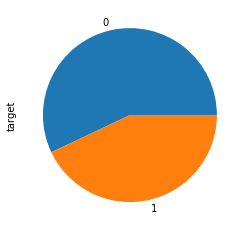

In [21]:
train.target.value_counts().plot.pie()

In [31]:
def generate_bar(data, column):
    frequency = data[column].value_counts().sort_index()
    labels = frequency.keys()
    Positives = []
    Negatives = []
    for value in labels:
        Positives.append(len(data[(data.target == 1) & (data[column]==value)]))
        Negatives.append(len(data[(data.target == 0) & (data[column]==value)]))
    fig, ax =plt.subplots()
    ax.bar(labels, Negatives, label = 0)
    ax.bar(labels, Positives, bottom = Negatives, label = 1)
    ax.set_ylabel('frequency')
    ax.legend()
    plt.show()

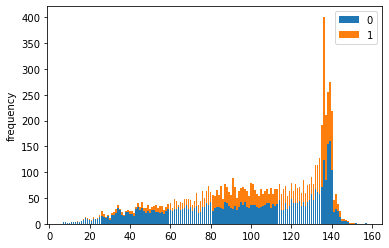

In [32]:
generate_bar(train,'tweet_length')

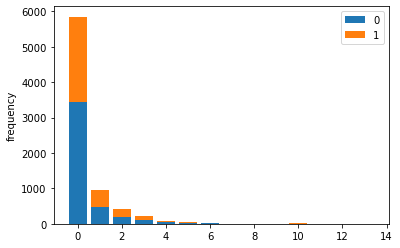

In [33]:
generate_bar(train,'num_hashtags')

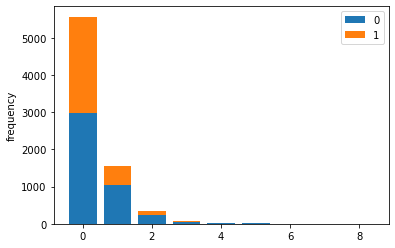

In [34]:
generate_bar(train,'num_mentions')